In [297]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer as dataset
import matplotlib.pyplot as plt

In [298]:
def plot_results(history):
    plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
    plt.plot(history.history['val_accuracy'], label='Precisión de validación')
    plt.xlabel('Épocas')
    plt.ylabel('Precisión')
    plt.legend()
    plt.show()

    # Graficar la pérdida
    plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
    plt.plot(history.history['val_loss'], label='Pérdida de validación')
    plt.xlabel('Épocas')
    plt.ylabel('Pérdida')
    plt.legend()
    plt.show()

In [299]:
data = dataset()
X = data.data
y = data.target

In [300]:
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [301]:
list(data.target_names)

['malignant', 'benign']

In [302]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [303]:
# Convertir las etiquetas a formato one-hot encoding
y = to_categorical(y)
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [304]:
input_dim = len(X[0])
num_classes = len(data.target_names)

#### Desafío 1: Cambiar la Tasa de Aprendizaje del Optimizador Adam

El optimizador Adam tiene una tasa de aprendizaje por defecto de 0.001. Intente cambiar esta tasa de aprendizaje a diferentes valores y observe cómo afecta el rendimiento del modelo.

In [305]:
# Crear el modelo MLP
model = Sequential()
model.add(Dense(30, input_dim=input_dim, activation='relu', kernel_regularizer=l2(0.01)))  # Capa de entrada con 10 neuronas y función de activación ReLU
model.add(Dropout(0.5))
model.add(Dense(20, activation='relu', kernel_regularizer=l2(0.01)))  # Capa oculta con 10 neuronas y función de activación ReLU
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Resumen del modelo
model.summary()

Model: "sequential_123"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_413 (Dense)               │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_288 (Dropout)           │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_414 (Dense)               │ (None, 20)             │           620 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_289 (Dropout)           │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_415 (Dense)               │ (None, 2)              │            42 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,592 (6.22 KB)

 Trainable params: 1,592 (6.22 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50


82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4969 - loss: 175.3014 - val_accuracy: 0.6957 - val_loss: 21.1119
Epoch 2/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4852 - loss: 75.6952 - val_accuracy: 0.3043 - val_loss: 6.0686
Epoch 3/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5686 - loss: 40.5522 - val_accuracy: 0.8913 - val_loss: 1.0168
Epoch 4/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5169 - loss: 32.7596 - val_accuracy: 0.8043 - val_loss: 2.4139
Epoch 5/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5699 - loss: 18.9555 - val_accuracy: 0.7391 - val_loss: 2.0593
Epoch 6/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5567 - loss: 13.5829 - val_accuracy: 0.8696 - val_loss: 0.7401
Epoch 7/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5472 - loss: 6.6318 - val_accuracy: 0.8043 - val_loss: 0.8135
Epoch 8/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6349 - loss: 4.7081 - val_accuracy: 0.7609 - val_loss: 0.

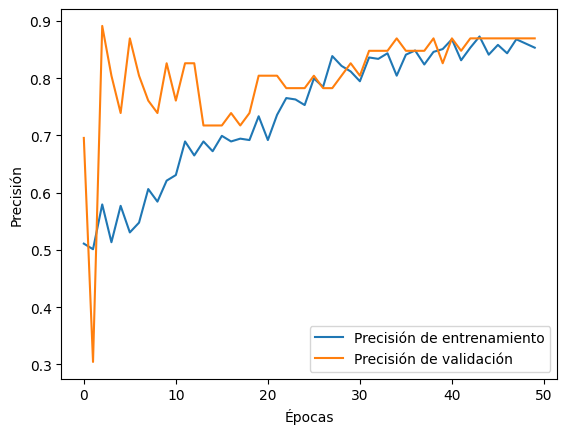

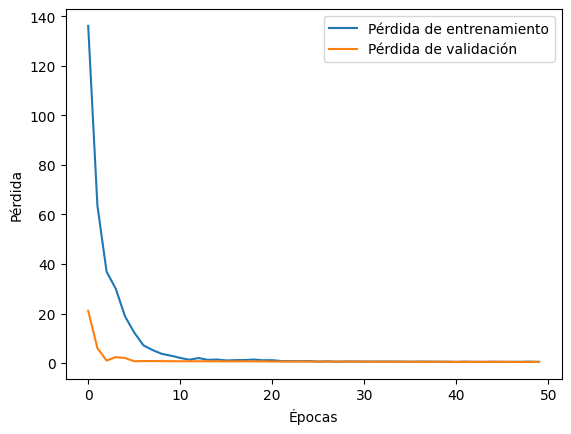

In [306]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=5, validation_split=0.1)
plot_results(history)

1. Cambie la tasa de aprendizaje a 0.01:

In [307]:
# Crear el modelo MLP
model = Sequential()
model.add(Dense(30, input_dim=input_dim, activation='relu', kernel_regularizer=l2(0.01)))  # Capa de entrada con 10 neuronas y función de activación ReLU
model.add(Dropout(0.5))
model.add(Dense(20, activation='relu', kernel_regularizer=l2(0.01)))  # Capa oculta con 10 neuronas y función de activación ReLU
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer=keras.optimizers.Adam(0.01), loss='categorical_crossentropy', metrics=['accuracy'])

In [308]:
history = model.fit(X_train, y_train, epochs=50, batch_size=5, validation_split=0.1)

Epoch 1/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5431 - loss: 145.3293 - val_accuracy: 0.8261 - val_loss: 0.7163
Epoch 2/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7836 - loss: 1.1856 - val_accuracy: 0.8478 - val_loss: 0.6773
Epoch 3/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7451 - loss: 0.8476 - val_accuracy: 0.8478 - val_loss: 0.6102
Epoch 4/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6915 - loss: 0.7803 - val_accuracy: 0.7391 - val_loss: 0.7244
Epoch 5/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6508 - loss: 0.7763 - val_accuracy: 0.8478 - val_loss: 0.5920
Epoch 6/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7228 - loss: 0.7256 - val_accuracy: 0.8478 - val_loss: 0.6701
Epoch 7/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7683 - loss: 0.6708 - val_accuracy: 0.7609 - val_loss: 0.6740
Epoch 8/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7087 - loss: 0.7042 - val_accuracy: 0.8696 - val_los

In [309]:
# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Precisión en el conjunto de prueba: {accuracy * 100:.2f}%')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9278 - loss: 0.4022 
Precisión en el conjunto de prueba: 92.11%


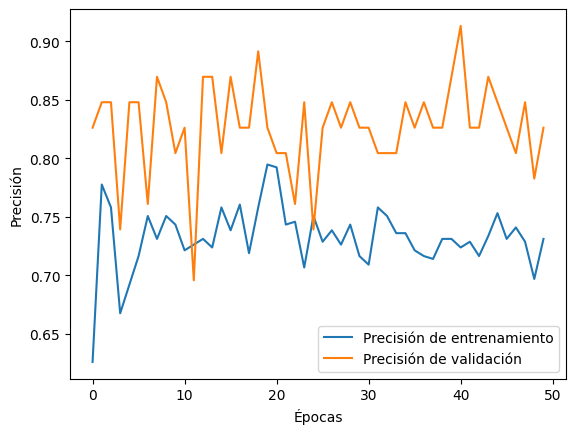

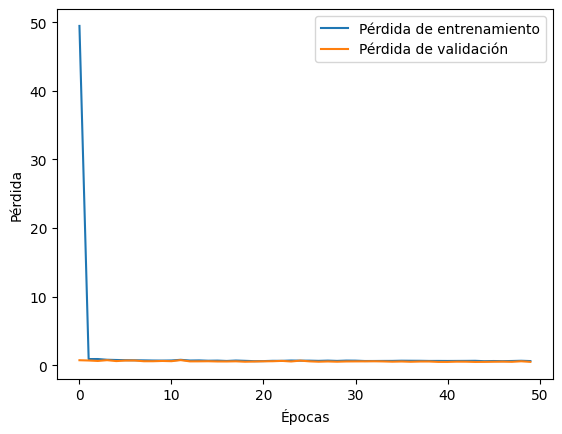

In [310]:
plot_results(history=history)

2. Cambie la tasa de aprendizaje a 0.0001:

In [311]:
# Crear el modelo MLP
model = Sequential()
model.add(Dense(30, input_dim=input_dim, activation='relu', kernel_regularizer=l2(0.01)))  # Capa de entrada con 10 neuronas y función de activación ReLU
model.add(Dropout(0.5))
model.add(Dense(20, activation='relu', kernel_regularizer=l2(0.01)))  # Capa oculta con 10 neuronas y función de activación ReLU
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer=keras.optimizers.Adam(0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=5, validation_split=0.1)

Epoch 1/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4897 - loss: 106.7111 - val_accuracy: 0.6957 - val_loss: 8.3952
Epoch 2/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5528 - loss: 90.9529 - val_accuracy: 0.6957 - val_loss: 8.9001
Epoch 3/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4667 - loss: 104.3777 - val_accuracy: 0.6957 - val_loss: 8.9863
Epoch 4/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4975 - loss: 83.7346 - val_accuracy: 0.6957 - val_loss: 5.9782
Epoch 5/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5469 - loss: 75.1854 - val_accuracy: 0.7174 - val_loss: 4.4393
Epoch 6/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4718 - loss: 87.3421 - val_accuracy: 0.7609 - val_loss: 2.6304
Epoch 7/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4858 - loss: 73.1167 - val_accuracy: 0.8261 - val_loss: 1.3660
Epoch 8/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5125 - loss: 63.4322 - val_accuracy: 0.8696 -

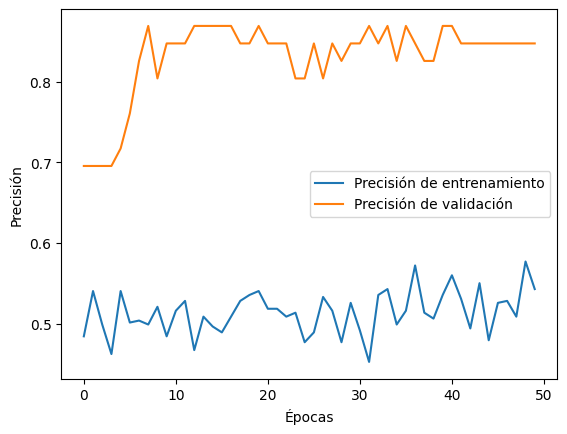

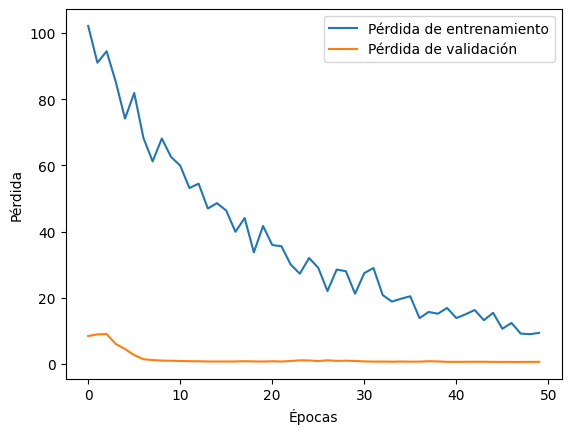

In [312]:
plot_results(history=history)

3. Probar con tasa de aprendizaje = 0.1

In [313]:
# Crear el modelo MLP
model = Sequential()
model.add(Dense(30, input_dim=input_dim, activation='relu', kernel_regularizer=l2(0.01)))  # Capa de entrada con 10 neuronas y función de activación ReLU
model.add(Dropout(0.5))
model.add(Dense(20, activation='relu', kernel_regularizer=l2(0.01)))  # Capa oculta con 10 neuronas y función de activación ReLU
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer=keras.optimizers.Adam(0.1), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=5, validation_split=0.1)

Epoch 1/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4983 - loss: 185.5756 - val_accuracy: 0.6957 - val_loss: 2.4689
Epoch 2/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6340 - loss: 2.3937 - val_accuracy: 0.6957 - val_loss: 2.1180
Epoch 3/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5971 - loss: 2.1376 - val_accuracy: 0.6957 - val_loss: 1.9353
Epoch 4/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6359 - loss: 1.9314 - val_accuracy: 0.6957 - val_loss: 1.8248
Epoch 5/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5147 - loss: 1.8051 - val_accuracy: 0.6957 - val_loss: 1.6384
Epoch 6/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6416 - loss: 1.6491 - val_accuracy: 0.6957 - val_loss: 1.5725
Epoch 7/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6164 - loss: 1.5554 - val_accuracy: 0.6957 - val_loss: 1.4730
Epoch 8/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6655 - loss: 1.4481 - val_accuracy: 0.6957 - val_los

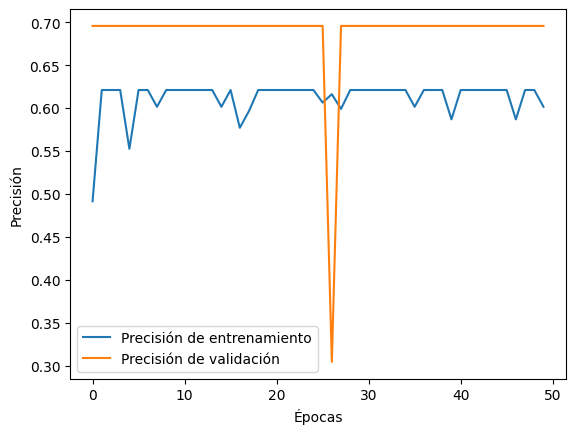

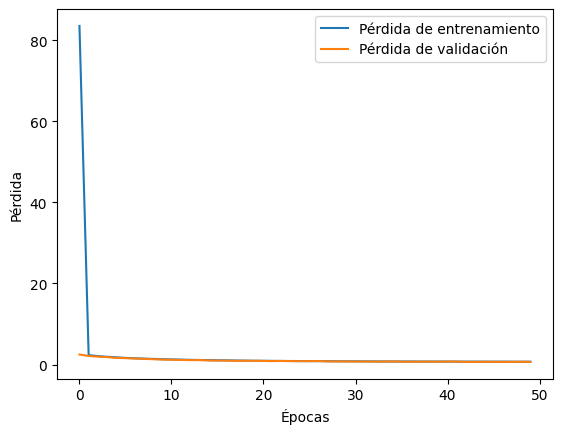

In [314]:
plot_results(history)

*¿Cómo afecta cada cambio en la tasa de aprendizaje a la precisión y la pérdida del modelo durante el entrenamiento y la validación?*

Precisión: Las tasas de aprendizaje que son muy bajas afectan en que es probable que el modelo llegue a un mínimo local, puesto a que se están realizando pasos muy pequeños en la curva de la función de coste. En el caso contrario, si la tasa de aprendizaje es muy alta conlleva a que se realicen pasos por sobre el mínimo global, provocando que la precisión aumente o disminuya considerablemente en cada epoch.

Pérdida: Las tasas de aprendizaje muy bajas afectan en que el valor del error avanza demasiado lento, lo que provocaría que se declaren más epochs, aunque no sería una muy buena opción considerando que la pérdida se puede mantener igual durante todo el entrenamiento. Si consideramos una tasa de aprendizaje alta, como ocurren estos grandes saltos en la curva del error, podría decirse que estos pasos hacen que el error oscile siempre entre dos valores muy cercanos entre sí. 

#### Desafío 2: Modificar el Número de Neuronas en las Capas Ocultas

 Intente cambiar el numero de neuronas del modelo actual y observe cómo afecta el rendimiento del modelo.

1. Cambie el número de neuronas a 256 en cada capa oculta:

In [315]:
# Crear el modelo MLP
model = Sequential()
model.add(Dense(256, input_dim=input_dim, activation='relu', kernel_regularizer=l2(0.01)))  # Capa de entrada con 10 neuronas y función de activación ReLU
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.01)))  # Capa oculta con 10 neuronas y función de activación ReLU
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=5, validation_split=0.1)

Epoch 1/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5667 - loss: 56.9621 - val_accuracy: 0.8261 - val_loss: 4.5636
Epoch 2/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6478 - loss: 24.6454 - val_accuracy: 0.8696 - val_loss: 4.7793
Epoch 3/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7576 - loss: 14.4387 - val_accuracy: 0.7174 - val_loss: 7.5237
Epoch 4/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7817 - loss: 8.6804 - val_accuracy: 0.8478 - val_loss: 3.2156
Epoch 5/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7768 - loss: 7.6178 - val_accuracy: 0.7174 - val_loss: 6.5674
Epoch 6/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7637 - loss: 7.0961 - val_accuracy: 0.8696 - val_loss: 2.7604
Epoch 7/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8150 - loss: 4.2157 - val_accuracy: 0.8696 - val_loss: 3.4481
Epoch 8/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8497 - loss: 4.4428 - val_accuracy: 0.8696 - val_lo

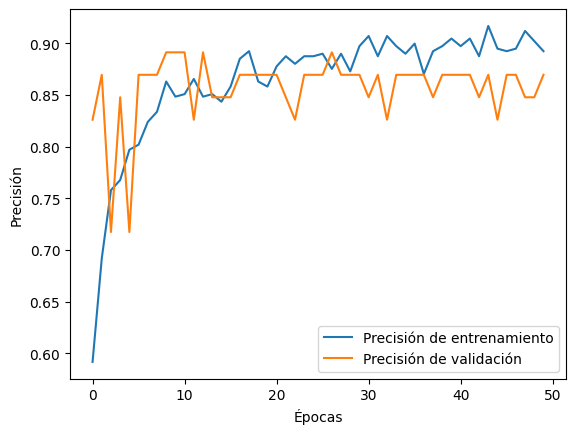

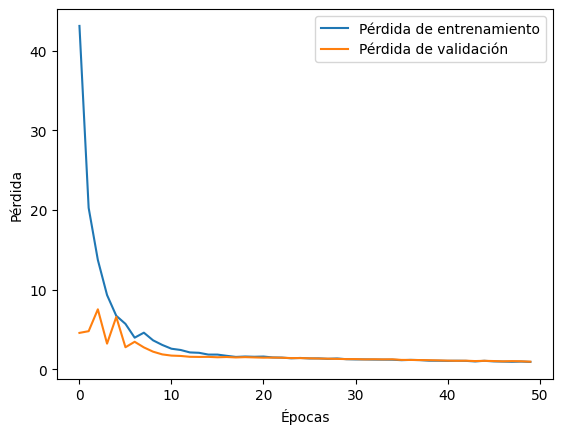

In [316]:
plot_results(history)

2. Cambie el número de neuronas a 1024 en cada capa oculta:

In [317]:
model = Sequential()
model.add(Dense(1024, input_dim=input_dim, activation='relu', kernel_regularizer=l2(0.01)))  # Capa de entrada con 10 neuronas y función de activación ReLU
model.add(Dropout(0.5))
model.add(Dense(1024, activation='relu', kernel_regularizer=l2(0.01)))  # Capa oculta con 10 neuronas y función de activación ReLU
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=5, validation_split=0.1)

Epoch 1/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5569 - loss: 49.5745 - val_accuracy: 0.6957 - val_loss: 97.4447
Epoch 2/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7658 - loss: 28.1781 - val_accuracy: 0.8478 - val_loss: 16.9524
Epoch 3/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7726 - loss: 21.6532 - val_accuracy: 0.8478 - val_loss: 12.8184
Epoch 4/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7352 - loss: 22.4146 - val_accuracy: 0.8478 - val_loss: 12.7923
Epoch 5/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8446 - loss: 10.2290 - val_accuracy: 0.8696 - val_loss: 7.8609
Epoch 6/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7961 - loss: 10.2302 - val_accuracy: 0.8478 - val_loss: 8.3804
Epoch 7/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8310 - loss: 8.2733 - val_accuracy: 0.8696 - val_loss: 6.2272
Epoch 8/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8120 - loss: 7.5841 - val_accuracy: 0.8696 -

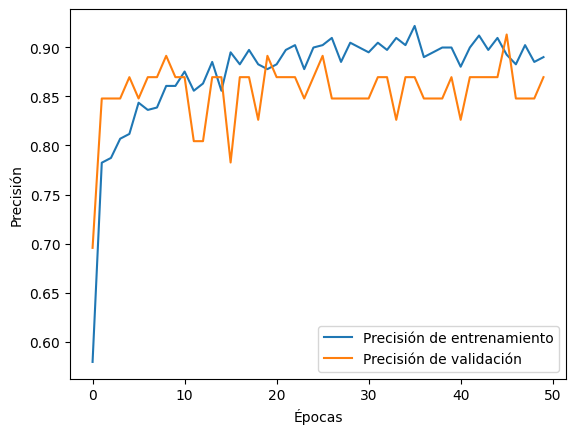

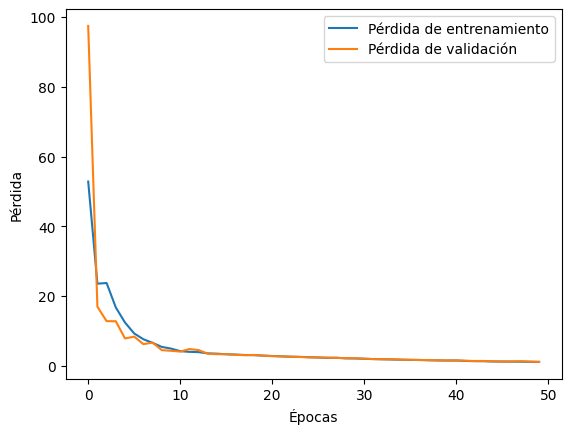

In [318]:
plot_results(history)

*¿Cómo cambia la precisión y la pérdida del modelo con diferentes números de neuronas en las capas ocultas?*

Dada las dos situaciones anteriores, la cantidad de neuronas lleva a un caso de overfitting que quizás no sea muy aparente al ver la curva de pérdida, pero realmente se aprecia en la precisión de ambos modelos por su alta precisión de entrenamiento y una precisión menor en el conjunto de validación. Si comparamos este resultado con el modelo con 10 neuronas por capa, usar un modelo menos complejo puede ser una opción más apropiada, aunque eso puede variar con otros datasets.

#### Desafío 3: Cambiar la Cantidad de Épocas de Entrenamiento

In [319]:
# Crear el modelo MLP
model = Sequential()
model.add(Dense(30, input_dim=input_dim, activation='relu', kernel_regularizer=l2(0.01)))  # Capa de entrada con 10 neuronas y función de activación ReLU
model.add(Dropout(0.5))
model.add(Dense(20, activation='relu', kernel_regularizer=l2(0.01)))  # Capa oculta con 10 neuronas y función de activación ReLU
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=200, batch_size=5, validation_split=0.1)

Epoch 1/200
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4370 - loss: 62.1992 - val_accuracy: 0.6957 - val_loss: 3.1867
Epoch 2/200
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5876 - loss: 22.9759 - val_accuracy: 0.8043 - val_loss: 0.7739
Epoch 3/200
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4815 - loss: 17.2090 - val_accuracy: 0.3043 - val_loss: 1.2581
Epoch 4/200
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4885 - loss: 8.6987 - val_accuracy: 0.4348 - val_loss: 0.8872
Epoch 5/200
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5309 - loss: 5.0198 - val_accuracy: 0.8696 - val_loss: 0.7871
Epoch 6/200
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5123 - loss: 5.9873 - val_accuracy: 0.8043 - val_loss: 0.8098
Epoch 7/200
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6104 - loss: 3.4991 - val_accuracy: 0.6957 - val_loss: 0.8204
Epoch 8/200
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5932 - loss: 1.5195 - val_accuracy: 0.6087 

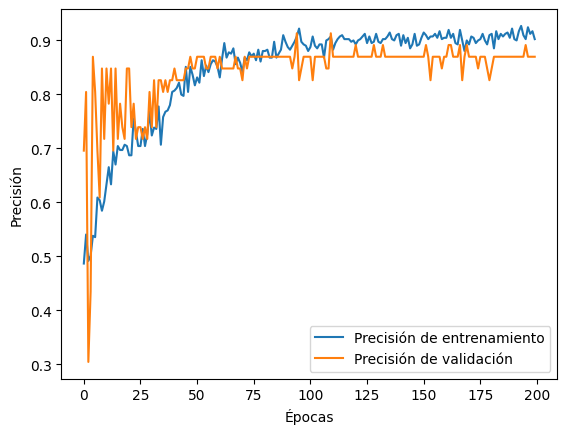

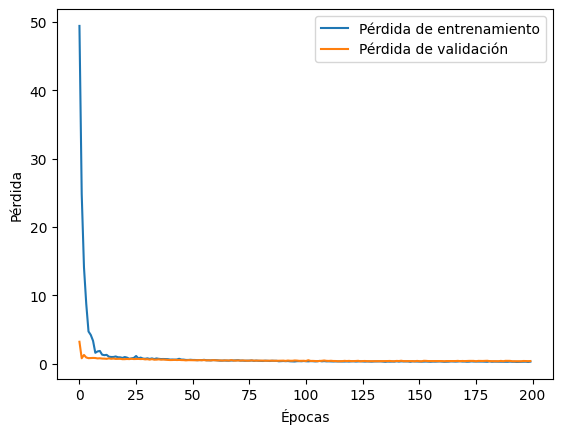

In [320]:
plot_results(history)

1. Cambie el número de épocas a 10:

Epoch 1/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4423 - loss: 113.2468 - val_accuracy: 0.6957 - val_loss: 8.8457
Epoch 2/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4633 - loss: 56.0731 - val_accuracy: 0.7826 - val_loss: 1.7215
Epoch 3/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4737 - loss: 45.2796 - val_accuracy: 0.7174 - val_loss: 3.2940
Epoch 4/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5100 - loss: 15.3337 - val_accuracy: 0.7391 - val_loss: 1.9356
Epoch 5/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5598 - loss: 8.8555 - val_accuracy: 0.7391 - val_loss: 1.4550
Epoch 6/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4974 - loss: 8.1623 - val_accuracy: 0.7609 - val_loss: 0.6949
Epoch 7/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5544 - loss: 5.3051 - val_accuracy: 0.7391 - val_loss: 0.7602
Epoch 8/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6279 - loss: 2.6076 - val_accuracy: 0.7609 - val_

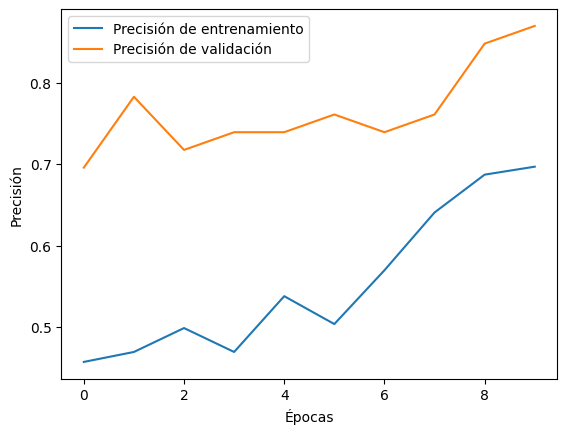

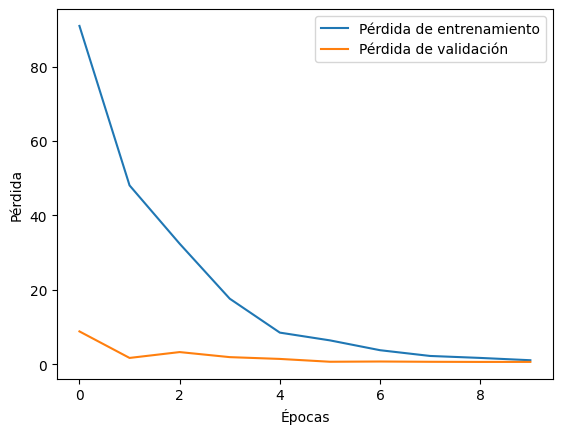

In [321]:
# Crear el modelo MLP
model = Sequential()
model.add(Dense(30, input_dim=input_dim, activation='relu', kernel_regularizer=l2(0.01)))  # Capa de entrada con 10 neuronas y función de activación ReLU
model.add(Dropout(0.5))
model.add(Dense(20, activation='relu', kernel_regularizer=l2(0.01)))  # Capa oculta con 10 neuronas y función de activación ReLU
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, batch_size=5, validation_split=0.1)
plot_results(history)

2. Cambie el número de épocas a 30:

Epoch 1/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4101 - loss: 90.9183 - val_accuracy: 0.3043 - val_loss: 11.2582
Epoch 2/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5976 - loss: 33.8206 - val_accuracy: 0.6957 - val_loss: 4.8479
Epoch 3/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5615 - loss: 29.1157 - val_accuracy: 0.7174 - val_loss: 4.9377
Epoch 4/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5980 - loss: 16.6602 - val_accuracy: 0.8696 - val_loss: 0.7458
Epoch 5/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5766 - loss: 11.8760 - val_accuracy: 0.8696 - val_loss: 0.8210
Epoch 6/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4690 - loss: 9.2325 - val_accuracy: 0.8696 - val_loss: 0.8631
Epoch 7/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5566 - loss: 4.0431 - val_accuracy: 0.8261 - val_loss: 0.7975
Epoch 8/30
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6481 - loss: 3.1870 - val_accuracy: 0.8478 - val

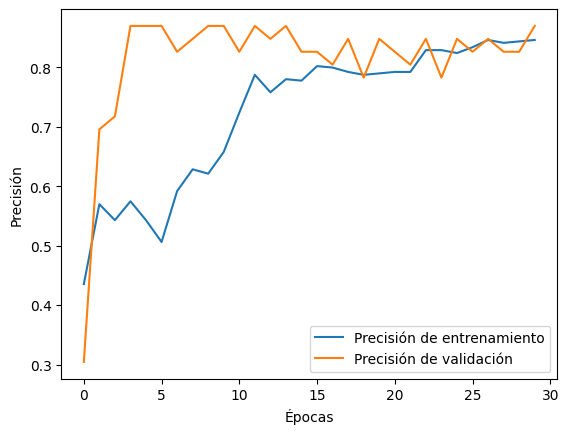

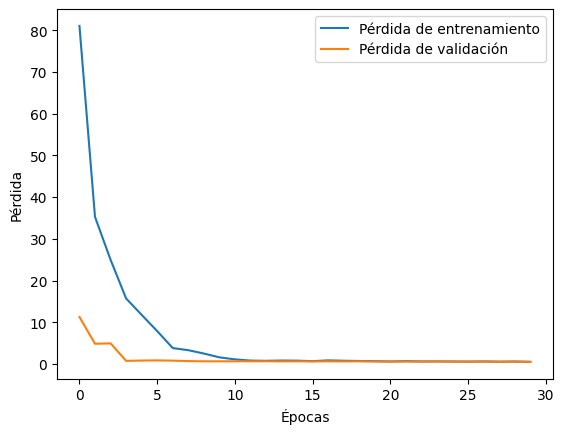

In [322]:
# Crear el modelo MLP
model = Sequential()
model.add(Dense(30, input_dim=input_dim, activation='relu', kernel_regularizer=l2(0.01)))  # Capa de entrada con 10 neuronas y función de activación ReLU
model.add(Dropout(0.5))
model.add(Dense(20, activation='relu', kernel_regularizer=l2(0.01)))  # Capa oculta con 10 neuronas y función de activación ReLU
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=30, batch_size=5, validation_split=0.1)
plot_results(history)

*¿Cómo afecta el número de épocas a la precisión y la pérdida del modelo durante el entrenamiento y la validación? ¿Observa algún signo de sobreajuste o subajuste?*

El número de epochs puede afectar mucho al rendimiento de los modelos, como se aplica en el caso de los 200 epochs, cuyo entrenamiento iba avanzando bien hasta que en un punto comenzó a sufrir de overfitting. Con menos epochs se logra tener un modelo que no sufra de overfitting, por lo que hay que encontrar un valor adecuado para este hiperparámetro considerando los datos que tenemos.

#### Desafío 4: Modificar la Función de Activación en las Capas Ocultas

1. Cambie la función de activación a `sigmoid`:

Epoch 1/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5008 - loss: 1.2366 - val_accuracy: 0.6957 - val_loss: 0.9220
Epoch 2/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5598 - loss: 0.9948 - val_accuracy: 0.6957 - val_loss: 0.7883
Epoch 3/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5957 - loss: 0.8343 - val_accuracy: 0.6957 - val_loss: 0.7343
Epoch 4/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6149 - loss: 0.7960 - val_accuracy: 0.6957 - val_loss: 0.6950
Epoch 5/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5635 - loss: 0.7857 - val_accuracy: 0.6957 - val_loss: 0.6623
Epoch 6/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6575 - loss: 0.7366 - val_accuracy: 0.6957 - val_loss: 0.6562
Epoch 7/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6603 - loss: 0.6962 - val_accuracy: 0.6957 - val_loss: 0.6300
Epoch 8/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6194 - loss: 0.7263 - val_accuracy: 0.6957 - val_loss:

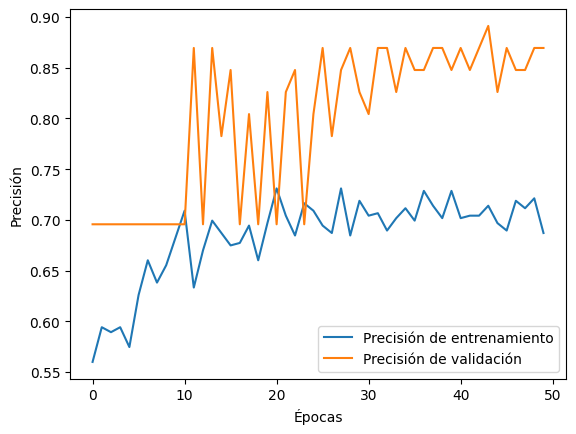

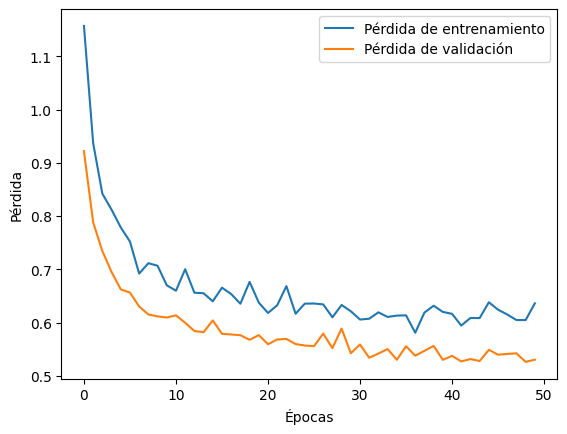

In [323]:
# Crear el modelo MLP
model = Sequential()
model.add(Dense(30, input_dim=input_dim, activation='sigmoid', kernel_regularizer=l2(0.01)))  # Capa de entrada con 10 neuronas y función de activación ReLU
model.add(Dropout(0.5))
model.add(Dense(20, activation='sigmoid', kernel_regularizer=l2(0.01)))  # Capa oculta con 10 neuronas y función de activación ReLU
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=5, validation_split=0.1)
plot_results(history)

2. Cambie la función de activación a `tanh`:

Epoch 1/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5651 - loss: 1.2451 - val_accuracy: 0.6957 - val_loss: 0.8586
Epoch 2/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5908 - loss: 1.0468 - val_accuracy: 0.6957 - val_loss: 0.7714
Epoch 3/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5915 - loss: 1.0005 - val_accuracy: 0.8696 - val_loss: 0.6503
Epoch 4/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6458 - loss: 0.8243 - val_accuracy: 0.8696 - val_loss: 0.6111
Epoch 5/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6951 - loss: 0.7591 - val_accuracy: 0.8478 - val_loss: 0.6375
Epoch 6/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6802 - loss: 0.7875 - val_accuracy: 0.8696 - val_loss: 0.5961
Epoch 7/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7092 - loss: 0.7328 - val_accuracy: 0.8696 - val_loss: 0.5836
Epoch 8/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7365 - loss: 0.6707 - val_accuracy: 0.7609 - val_loss:

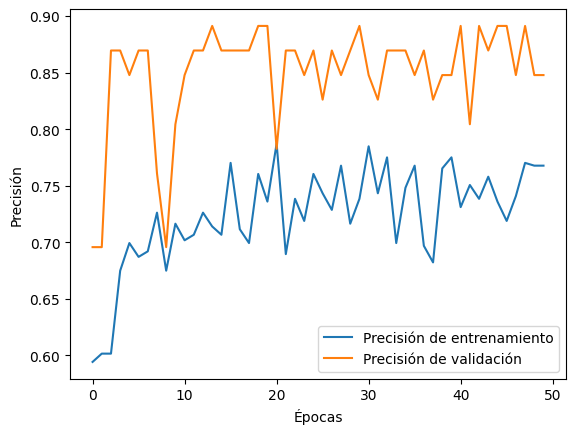

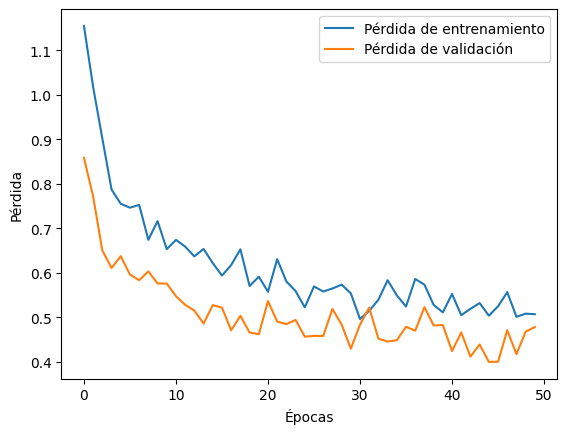

In [324]:
model = Sequential()
model.add(Dense(30, input_dim=input_dim, activation='tanh', kernel_regularizer=l2(0.01)))  # Capa de entrada con 10 neuronas y función de activación ReLU
model.add(Dropout(0.5))
model.add(Dense(20, activation='tanh', kernel_regularizer=l2(0.01)))  # Capa oculta con 10 neuronas y función de activación ReLU
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=5, validation_split=0.1)
plot_results(history)

*¿Cómo afectan las diferentes funciones de activación en las capas ocultas a la precisión y la pérdida del modelo durante el entrenamiento y la validación?*

Ambas funciones provocaban que el modelo tenían variaciones muy grandes de precisión durante la primera mitad del entrenamiento con una gran diferencia entre precisión/pérdida de validación y entrenamiento (en parte puede ser causa del dropout, pero la diferencia sigue siendo muy alta comparado al uso de relu). Adicionalmente, sus curvas de pérdida disminuían mucho más lento que con relu (referirse al primer modelo del desafío 1). De todas maneras, estas dos funciones no son las más apropiadas para las capas ocultas por problemas de gradiente que pueden impedir que los modelos aprendan, cosa que relu evita en gran parte.